<h1>Import Libraries<h1/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/CovidClassification/

/content/drive/MyDrive/ColabNotebooks/CovidClassification


In [ ]:
import os
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import sklearn.ensemble as ek
from sklearn import tree,model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score , mean_squared_error

<h1>Features for dataset<h1/>

In [ ]:
# Class Names and Class labels for the 2 classification
class_names = ['normal','covid']
# 0 = normal, 1 = Covid
class_labels = [0,1]

<h1>Data Exploration<h1/>

In [ ]:
# Initialize Count
normalCount=0
covidCount=0
imageCount=0

# Image size: 299 x 299 Pixels grayscale
image_size = (299, 299)

# Read image files - PNG
for class_name in class_names:
    for item in os.listdir(f'dataset_6/{class_name}/'):
        if item.endswith(".png"):

            # Check image size 299 x 299
            image_path = os.path.join(os.getcwd(), 'dataset_6', class_name, item)
            # Raise Error if not correct size
            if Image.open(image_path).size != image_size:
                raise ValueError(f"The image size is not {image_size[0]} by {image_size[1]} pixels: {image_path}")

            # Increment Counter for images
            imageCount+=1
            if(class_name=='normal'):
                normalCount+=1
            else:
                covidCount+=1

print(f"Normal Count: {normalCount}\nCovid Count: {covidCount}\nTotal Count: {imageCount}\n")

Normal Count: 250
Covid Count: 180
Total Count: 430



<h1>Create Dataset for training Model<h1/>

In [ ]:
# np array for images. 430 images, 299 pixel, 299 pixels
images = np.empty((imageCount,image_size[0],image_size[1]))
# np arraay for image labels, 430 labels
labels = np.empty((imageCount,1))

# Index for assigning image to np array loction
index=0

# Loop Through normal/covid img folders
for label,class_name in enumerate(class_names):
    # Iterate through items in folder
    for item in os.listdir(os.getcwd()+f'/dataset_6/{class_name}/'):
        # if item is png image
        if item.endswith(".png"):
            image_path = os.getcwd()+f'/dataset_6/{class_name}/{item}'
            # Read item into np array
            image = np.array(Image.open(image_path))
            # Normalize image from 0-255, to 0 to 1
            image = image/255 #???? Normalize?
            # Add image to np array
            images[index]=image
            # Add label to np array
            labels[index]=label
            index+=1
# Convert labels to INT
labels=np.array(labels,dtype=np.int32)

<h1>Visualize images from normal and covid folder<h1/>

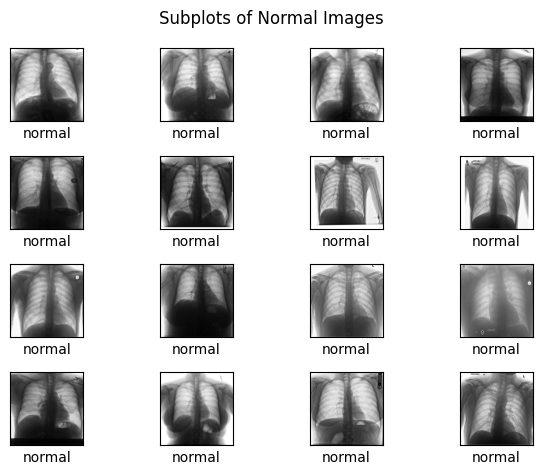

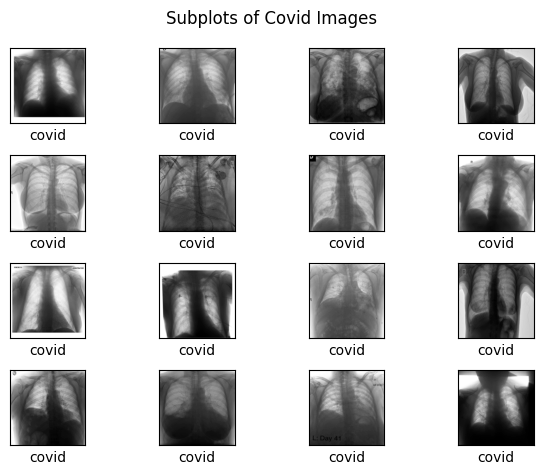

In [ ]:
#Visualization for both normal and Covid
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i][0]])
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots of Normal Images")
plt.tight_layout()
plt.show()


for i in range(normalCount,normalCount+16):
    plt.subplot(4,4,i-normalCount+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(labels[i][0])])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots of Covid Images")
plt.show()

<h1>Split dataset into training and testing dataset <h1/>

In [ ]:
#Fixed seed
seed = 88
# Train Test Split for training machine learning and Deep Learning
# Split percentage 80% for train, 20% for test.
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=seed
)


<h1>Visualize Training Dataset<h1/>

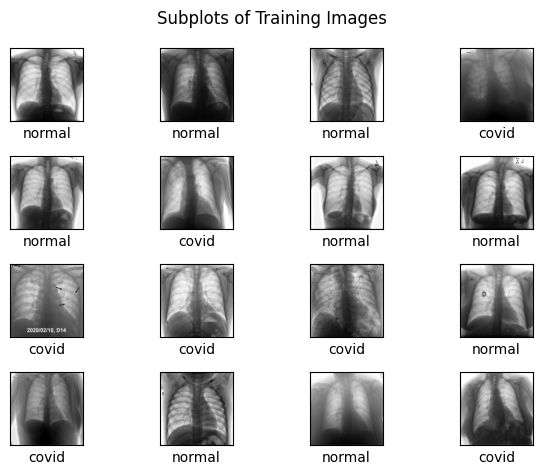

In [ ]:
#Visualize new dataset of both covid and normal lungs
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots of Training Images")
plt.tight_layout()
plt.show()

In [ ]:
print("\nTraining Dataset Size : Testing Dataset Size")
print("\n",len(train_images),":", len(test_images))


Training Dataset Size : Testing Dataset Size

 344 : 86


<h1>Machine Learning : Gradient Boosting Machine (GBM)<h1/>

# Reshape X to 2D and Y to 1D

In [ ]:
from sklearn.utils import column_or_1d
print(train_labels.shape)
print(train_images.shape)
print(test_labels.shape)
print(test_images.shape)

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

train_labels = column_or_1d(train_labels, warn=True)
test_labels = column_or_1d(test_labels, warn=True)
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

(344, 1)
(344, 299, 299)
(86, 1)
(86, 299, 299)


<ipython-input-27-209e675d0ad2>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  train_labels = column_or_1d(train_labels, warn=True)
<ipython-input-27-209e675d0ad2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  test_labels = column_or_1d(test_labels, warn=True)


# Model Training

In [ ]:
classifier_original = lgb.LGBMClassifier()

In [ ]:
classifier_original.set_params(force_col_wise=True)
classifier_original.fit(train_images,train_labels)


LGBMClassifier(force_col_wise=True)

In [ ]:
pred_labels=classifier_original.predict(test_images)

In [ ]:
import matplotlib.pyplot as plt

batch_size = 32
num_samples = test_images.shape[0]
predictions = []
predictions.extend(pred_labels)
incorrect_indices = np.where(~(test_labels == predictions))
incorrect_labels = test_labels[incorrect_indices]
incorrect_true_labels = test_labels[incorrect_indices[0]]
print("Incorrect Label Indices:", incorrect_indices)



Incorrect Label Indices: (array([ 1, 10, 27, 32, 36, 43, 64, 67, 70]),)


In [ ]:
majority_classlabel = np.argmax(np.bincount(pred_labels))
majority_classlabel

0

In [ ]:
# For classification tasks (e.g., accuracy)
accuracy = accuracy_score(test_labels, pred_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8953488372093024


# Model Tuning

##Number of Estimator

In [ ]:
estimator_list = [10, 20, 50, 100]
best_estimator = 0
best_es_score = 0
for estimator in estimator_list:
  classifier = lgb.LGBMClassifier()
  classifier.set_params(n_estimators = estimator)
  classifier.fit(train_images,train_labels)
  pred_labels=classifier.predict(test_images)
  score = accuracy_score(test_labels, pred_labels)
  print (f"n-estimator:{estimator}")
  print (f"{classifier}:{score}")
  if (score > best_es_score):
    best_es_score = score
    best_estimator = estimator




n-estimator:10
LGBMClassifier(n_estimators=10):0.7674418604651163
n-estimator:20
LGBMClassifier(n_estimators=20):0.8372093023255814
n-estimator:50
LGBMClassifier(n_estimators=50):0.872093023255814
n-estimator:100
LGBMClassifier():0.8953488372093024


##Number of Learning Rate

In [ ]:
learningrate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
best_learningrate = 0
best_lr_score = 0
for learningrate in learningrate_list:
  classifier = lgb.LGBMClassifier()
  classifier.set_params(learning_rate = learningrate)
  classifier.fit(train_images,train_labels)
  pred_labels=classifier.predict(test_images)
  score = accuracy_score(test_labels, pred_labels)
  print (f"n-learningrate:{learningrate}")
  print (f"{classifier}:{score}")
  if (score > best_lr_score):
    best_lr_score = score
    best_learningrate = learningrate

n-learningrate:0.05
LGBMClassifier(learning_rate=0.05):0.872093023255814
n-learningrate:0.075
LGBMClassifier(learning_rate=0.075):0.8837209302325582
n-learningrate:0.1
LGBMClassifier():0.8953488372093024
n-learningrate:0.25
LGBMClassifier(learning_rate=0.25):0.8953488372093024
n-learningrate:0.5
LGBMClassifier(learning_rate=0.5):0.872093023255814
n-learningrate:0.75
LGBMClassifier(learning_rate=0.75):0.8604651162790697
n-learningrate:1
LGBMClassifier(learning_rate=1):0.872093023255814


## Number of Leaves

In [ ]:
num_leaves_values = [10, 20, 30, 40, 50]
best_leaves = 0
best_leave_score = 0
for leave in num_leaves_values:
  classifier = lgb.LGBMClassifier()
  classifier.set_params(num_leaves = leave)
  classifier.fit(train_images,train_labels)
  pred_labels=classifier.predict(test_images)
  score = accuracy_score(test_labels, pred_labels)
  print (f"n-leaves:{leave}")
  print (f"{classifier}:{score}")
  if (score > best_leave_score):
    best_leave_score = score
    best_leaves = leave

n-leaves:10
LGBMClassifier(num_leaves=10):0.8837209302325582
n-leaves:20
LGBMClassifier(num_leaves=20):0.8953488372093024
n-leaves:30
LGBMClassifier(num_leaves=30):0.8953488372093024
n-leaves:40
LGBMClassifier(num_leaves=40):0.8953488372093024
n-leaves:50
LGBMClassifier(num_leaves=50):0.8953488372093024


The accuracy remains consistent before and after the model tuning which can be an indicator of the initial model being configured with the most optimal setting. Hence, the further tuning had minimal impact on the model performance as the initial model has a strong starting accuracy.

# Performance Evaluation

In [ ]:
class_names = ['normal', 'covid']
print(classification_report(test_labels, pred_labels,target_names = class_names))

              precision    recall  f1-score   support

      normal       0.92      0.90      0.91        50
       covid       0.86      0.89      0.88        36

    accuracy                           0.90        86
   macro avg       0.89      0.89      0.89        86
weighted avg       0.90      0.90      0.90        86



In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        label = f"{cm[i, j]}\n{['TN', 'FP', 'FN', 'TP'][i * 2 + j]}"
        plt.text(j, i, label,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 88.88888888888889%


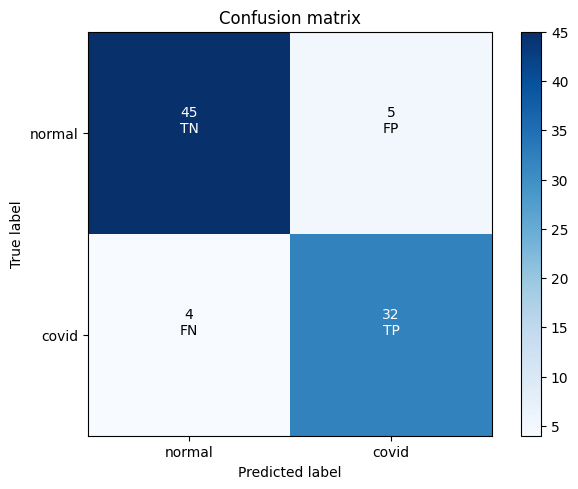

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred_labels)


print("Recall metric in the testing dataset: {}%".format(100*cm[1,1]/(cm[1,0]+cm[1,1])))

class_names = ["normal","covid"]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()

## Saved Model

In [ ]:
import lightgbm as lgb
import pickle


model = lgb.LGBMClassifier()


model.fit(train_images, train_labels)

# Save model using pickle
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import lightgbm as lgb
import pickle

# Load the model from the file using pickle
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Now you can use the model for predictions
predictions = model.predict(test_images)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int32)

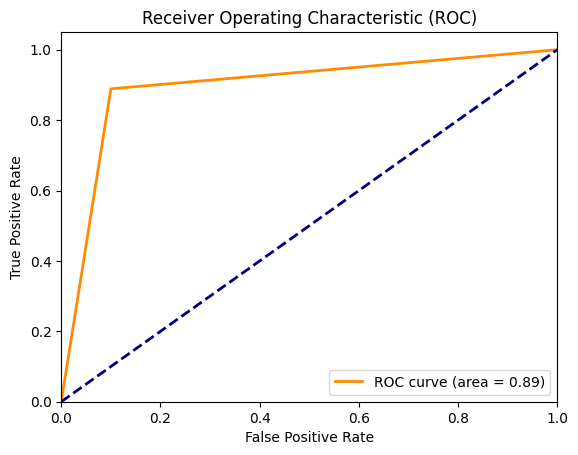

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()